In [103]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

In [104]:
df1 = pd.read_csv('recipeData.csv', encoding='latin1')
df1.head(4)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN


In [105]:
df1.size

1698803

In [106]:
df1.dropna()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
35,36,The Devil is in the Details (Duvel Clone)...,/homebrew/recipe/view/61925/the-devil-is-in-th...,Belgian Golden Strong Ale,23,41.64,1.069,1.005,8.40,40.71,...,1.058,80.0,1.50,Specific Gravity,All Grain,1.00,17.78,Force Carb,30 PSI,15241.0
80,81,Fat Head's Headhunter IPA Clone,/homebrew/recipe/view/110195/fat-head-s-headhu...,American IPA,7,41.64,1.072,1.014,7.52,87.48,...,1.061,65.0,1.30,Specific Gravity,All Grain,0.75,20.00,Force Carb,12 psi,15241.0
143,144,Bakke Brygg JuleAle 2016 20 l,/homebrew/recipe/view/392676/bakke-brygg-julea...,American Brown Ale,6,20.00,1.064,1.014,6.54,42.06,...,1.051,69.0,3.00,Specific Gravity,All Grain,1.00,17.00,Sukkerlake,5 5 g sukker/liter,18325.0
303,304,Golden Session,/homebrew/recipe/view/119256/golden-session,British Golden Ale,35,20.82,1.042,1.012,3.82,28.39,...,1.030,70.0,1.69,Specific Gravity,All Grain,0.50,21.11,Dextrose,5oz,26090.0
370,371,Chocolate Cherry Bock,/homebrew/recipe/view/64543/chocolate-cherry-bock,Traditional Bock,163,17.03,1.068,1.018,6.52,41.68,...,1.047,70.0,1.25,Specific Gravity,All Grain,1.50,10.00,CO2,12lbs,396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73191,73192,Hoegaarden Clone 21L,/homebrew/recipe/view/574105/hoegaarden-clone-21l,Witbier,175,21.00,1.053,1.011,5.41,14.65,...,1.039,70.0,3.50,Specific Gravity,All Grain,0.75,19.00,Sukkerlake,6-7 g sukker/l,61616.0
73304,73305,Crème Brûlée,/homebrew/recipe/view/612165/,Experimental Beer,67,20.82,1.060,1.022,5.25,21.58,...,1.045,78.0,1.68,Specific Gravity,All Grain,1.00,20.00,Keg,15psi,42609.0
73384,73385,Midtbrygg Blanc,/homebrew/recipe/view/491464/midtbrygg-blanc,Witbier,175,25.00,1.052,1.012,5.24,20.95,...,1.042,75.0,3.30,Specific Gravity,All Grain,1.00,18.00,Sukker,8,73426.0
73661,73662,Busted Knuckle Amberillo Ale,/homebrew/recipe/view/617610/busted-knuckle-am...,American Amber Ale,4,22.71,1.059,1.013,6.01,78.37,...,1.044,70.0,1.25,Specific Gravity,All Grain,0.35,20.00,Dextrose/ CO2,4.79oz for 6gal 4.5oz for 5.75 4.32 for 5.5g...,129328.0


In [107]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
BeerID,1.000000,-0.074825,0.001924,-0.024895,-0.030662,-0.051921,-0.015845,-0.046867,0.002819,-0.044273,-0.031692,-0.011609,0.036604,-0.032631,0.004569,0.537452
StyleID,-0.074825,1.000000,-0.006522,0.002699,0.007336,0.006617,-0.141124,0.166669,-0.006301,0.077969,0.002326,0.021515,0.006167,0.079123,-0.019661,-0.006596
Size(L),0.001924,-0.006522,1.000000,0.162237,0.141614,-0.013527,-0.029917,-0.018068,0.994143,0.044848,0.176071,0.108826,0.019246,0.026623,0.004278,-0.013027
OG,-0.024895,0.002699,0.162237,1.000000,0.936347,0.029432,-0.001655,0.013632,0.165162,0.031825,0.968138,0.067610,0.046841,0.020556,0.000518,-0.001912
FG,-0.030662,0.007336,0.141614,0.936347,1.000000,0.026851,-0.000719,0.029848,0.142974,0.028930,0.908611,0.061173,0.040541,0.013446,0.004477,-0.006508
ABV,-0.051921,0.006617,-0.013527,0.029432,0.026851,1.000000,0.290889,0.271332,-0.009800,0.120629,0.025421,0.047853,-0.069633,0.132699,0.060065,-0.019513
IBU,-0.015845,-0.141124,-0.029917,-0.001655,-0.000719,0.290889,1.000000,0.060283,-0.028258,0.078694,-0.007498,-0.033172,-0.044381,0.006180,0.035510,-0.040685
Color,-0.046867,0.166669,-0.018068,0.013632,0.029848,0.271332,0.060283,1.000000,-0.016798,0.058089,0.013451,-0.017297,-0.038406,0.016061,0.025622,-0.004933
BoilSize,0.002819,-0.006301,0.994143,0.165162,0.142974,-0.009800,-0.028258,-0.016798,1.000000,0.051219,0.175972,0.121971,0.017772,0.030936,0.003000,-0.015507
BoilTime,-0.044273,0.077969,0.044848,0.031825,0.028930,0.120629,0.078694,0.058089,0.051219,1.000000,0.026921,0.161295,0.006850,0.190922,-0.079809,-0.055086


Text(0, 0.5, 'International Bitterness Units')

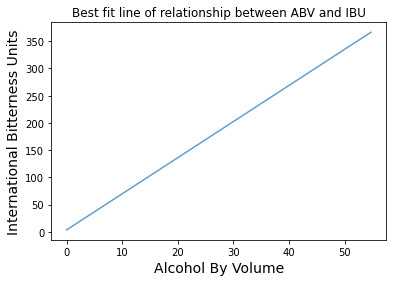

In [108]:
from scipy import stats
xs = df1['ABV']
ys = df1['IBU']

# Compute the linear regression
res = stats.linregress(xs, ys)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.slope * fx + res.intercept
plt.plot(fx, fy, '-', alpha=0.7)

plt.title("Best fit line of relationship between ABV and IBU")
plt.xlabel("Alcohol By Volume", size=14)
plt.ylabel("International Bitterness Units", size=14)

Text(0, 0.5, 'Color')

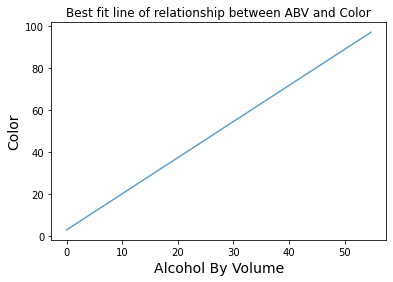

In [109]:
from scipy import stats
xs = df1['ABV']
ys = df1['Color']

# Compute the linear regression
res = stats.linregress(xs, ys)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.slope * fx + res.intercept
plt.plot(fx, fy, '-', alpha=0.7)

plt.title("Best fit line of relationship between ABV and Color")
plt.xlabel("Alcohol By Volume", size=14)
plt.ylabel("Color", size=14)

Text(0, 0.5, 'Finishing Gravity')

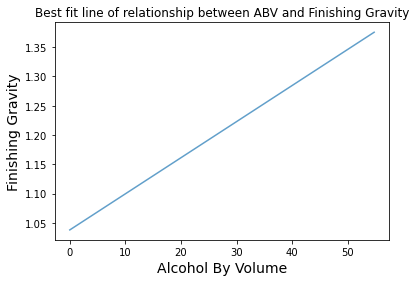

In [110]:
from scipy import stats
xs = df1['ABV']
ys = df1['FG']

# Compute the linear regression
res = stats.linregress(xs, ys)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.slope * fx + res.intercept
plt.plot(fx, fy, '-', alpha=0.7)

plt.title("Best fit line of relationship between ABV and Finishing Gravity")
plt.xlabel("Alcohol By Volume", size=14)
plt.ylabel("Finishing Gravity", size=14)

Text(0, 0.5, 'Boil Time')

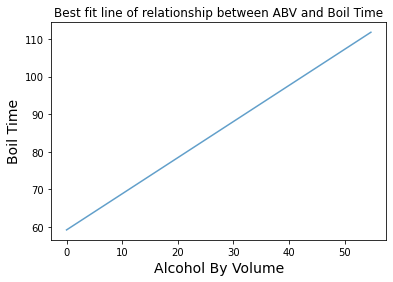

In [111]:
from scipy import stats
xs = df1['ABV']
ys = df1['BoilTime']

# Compute the linear regression
res = stats.linregress(xs, ys)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.slope * fx + res.intercept
plt.plot(fx, fy, '-', alpha=0.7)

plt.title("Best fit line of relationship between ABV and Boil Time")
plt.xlabel("Alcohol By Volume", size=14)
plt.ylabel("Boil Time", size=14)

In [112]:
np.unique(df1['BrewMethod'])

array(['All Grain', 'BIAB', 'Partial Mash', 'extract'], dtype=object)

In [119]:
df = df1.filter(['OG','FG','ABV', 'IBU', 'Color', 'BoilTime'], axis=1)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [121]:
model = LinearRegression()

In [122]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
x, y = df.drop('ABV',axis=1),df['ABV']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape
x_train

,OG,FG,IBU,Color,BoilTime
12263,1.048,1.011,18.55,4.79,90
5861,1.051,1.013,9.88,3.95,60
40526,1.058,1.013,48.00,9.83,60
40979,1.058,1.016,57.73,40.00,60
1110,1.060,1.015,39.80,31.50,60
...,...,...,...,...,...
20609,1.084,1.019,36.49,10.57,120
21440,1.067,1.017,32.26,6.19,90
73349,1.030,1.007,49.28,14.27,60
50057,1.046,1.007,17.66,4.34,90


In [123]:
model.fit(x_train, y_train)


LinearRegression()

In [124]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [125]:
p = model.predict(x_test)

In [126]:
y = y_test

In [127]:
p

array([5.15038197, 6.07772311, 6.10887398, ..., 7.22647598, 6.53487311,
       6.12475295])

In [128]:
y

4415     6.09
38387    5.92
16771    5.04
44525    8.21
61517    5.44
         ... 
42447    6.85
61430    6.60
31738    7.09
30031    6.64
4396     4.94
Name: ABV, Length: 22159, dtype: float64